# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


### Exercise 05.1

### Wavefunctions of Hydrogen Atom

The wave functions $\Psi_{nlm}(\vec{x})$ of the eigenstates of the hydrogen atom can be calculated analytically. The eigenstates are specified by three quantum numbers $n$, $l$ and $m$. 

Here, we focus on the ground state $\Psi_{100}(\vec{x})$ and the excited state $\Psi_{210}(\vec{x})$. For these eigenstates, it can be shown that the expectation value of the radius operator $\hat{r} = |\hat{\vec{x}}| = \sqrt{\hat x ^2 + \hat y ^2 + \hat z ^2}$ are given by:

$$\left\langle \hat{r} \right\rangle_{100} = \frac{3}{2}
\quad
\left\langle \hat{r} \right\rangle_{210} = 5.$$

These values are expressed in units of the Bohr radius $a_0=0.0529\,\mathrm{nm}$. We will use this way of expressing lengths throughout the following discussion.

### Metropolis Algorithm

The scope of this exercise sheet is to sample the probability density functions $|\Psi_{100}(\vec{x})|^2$ and $|\Psi_{210}(\vec{x})|^2$ using the **Metropolis algorithm**. 

To apply the Metropolis algorithm, we have to choose a **trial transition probability** $T(\vec{x}'|\vec{x_n})$, that describes the probability to transit from a given position $\vec{x_n}$ to any other position $\vec{x}'$ in the three dimensional space. We also have to choose a starting point $\vec{x_0}$ that can be used as $\vec{x_n}$ for $n=0$. Once we have sampled a proposed $\vec{x}'$ from the trial transition probability based on a given position $\vec{x_n}$, we have to compute the so-called **acceptance probability**: 

$$ A(\vec{x}'|\vec{x_n}) = \min \left \{1, \frac{p(\vec{x}')}{p(\vec{x_n})} \right \},$$

where $p$ is the probability density function that we desire to sample, so either $|\Psi_{100}(\vec{x})|^2$ and $|\Psi_{210}(\vec{x})|^2$ in our case. It tells us the probability with which we should accept the step $\vec{x}_{n+1} = \vec{x}'$ proposed by a draw from the trial transition probability or if we should leave $\vec{x}_{n+1} = \vec{x_n}$. 

In the lecture notes, it has been shown that in doing so the set of positions $\{ \vec{x_0}, \vec{x_1}, ..., \vec{x_{M_{max}}} \}$, where $M_{max}$ is the total number of throws, follows the probability density $p$.

In this exercise sheet, we use a uniform and a Gaussian trial transition probability to sample positions from $|\Psi_{100}(\vec{x})|^2$ and $|\Psi_{210}(\vec{x})|^2$ in order to estimate $\left\langle \hat{r} \right\rangle$ from the simulation.

### Uniform Trial Transition Probability

First of all, we use a uniform trial transition probability, which means that the trial positions $\vec{x}'$ are generated according to

$$
\begin{align}
    \vec{x}' = \vec{x_n} &+ \begin{bmatrix}
           \Delta x \\
           \Delta y \\
           \Delta z
         \end{bmatrix}
\end{align},
$$

where $ \Delta x,  \Delta y,  \Delta z$ are random variables that are independetly drawn from a uniform distribution on $[-\alpha, \alpha)$. 

In order to apply the Metropolis algorithm, we have to chose a starting point. Here, we use the origin $\vec{x_0} = \vec{0}$ of the three-dimensional space. A further discussion on the choice of the starting point can be found below. Then, we compute $10^4$ steps of the Metropolis algorithm without actually conducting a measurement in order to equilibrate the algorithm. We will discuss the number of steps needed for equilibration in further excersices. After that, we are ready to use the Metropolis algorithm to compute $M_{max}=10^6$ samples of both the ground state and the excited state probability density function. In doing so, we use $\alpha = 1.2$ and $\alpha = 3$ to obtain an acceptance rate of $50.71\,\%$ and $49.73\,\%$, respectively (see "50 % emperical rule" in the lecture notes, tradeoff between efficiency and correlation). 

Below, we visualize every 200th of the obtained positions in a 3D scatter plot. We observe the expected form of an s-orbital and a p-orbital, respectively.   

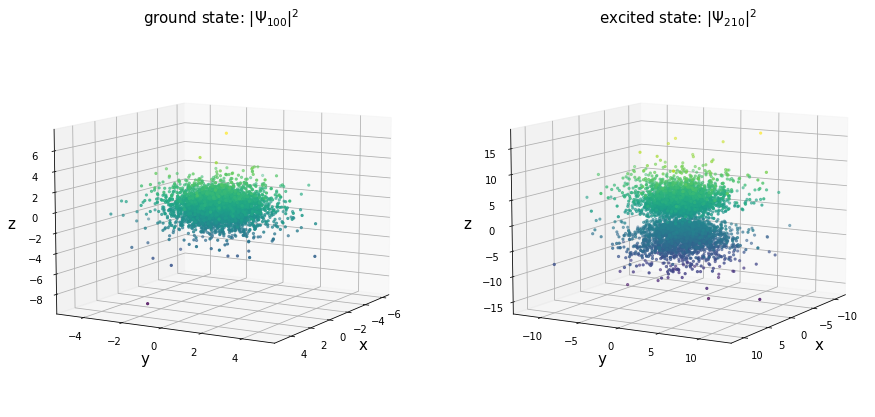

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))

# plot uni_110
x, y, z = np.loadtxt("data/uni_100.xyz", delimiter=',', unpack=True)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=z, marker='.')
ax1.set_xlabel('x', size=15)
ax1.set_ylabel('y', size=15)
ax1.set_zlabel('z', size=15)
ax1.view_init(10, 30)
ax1.set_title(r"ground state: $|\Psi_{100}|^2$", size=15)

# plot uni_210
x, y, z = np.loadtxt("data/uni_210.xyz", delimiter=',', unpack=True)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z, c=z, marker='.')
ax2.set_xlabel('x', size=15)
ax2.set_ylabel('y', size=15)
ax2.set_zlabel('z', size=15)
ax2.view_init(10, 30)
ax2.set_title(r"excited state: $|\Psi_{210}|^2$", size=15)

plt.show()

In the next figure, we illustrate the progressive mean of the obtained positions $\langle \hat{r} \rangle$ for both the ground state and the excited state as a function of the number of steps $M$ of the Metropolis algorithm, where we use $N_{max}=100$ blocks, each containing $L=10000$ steps, to estimate the uncertainty on the progressive mean.


For both states, we observe that the progressive mean converges to the theoretical expectation value of the radius operator $\langle \hat{r} \rangle$. This makes us confident that the Metropolis algorithm has successfully sampled the probability density functions of the corresponding hydrogen orbitals.

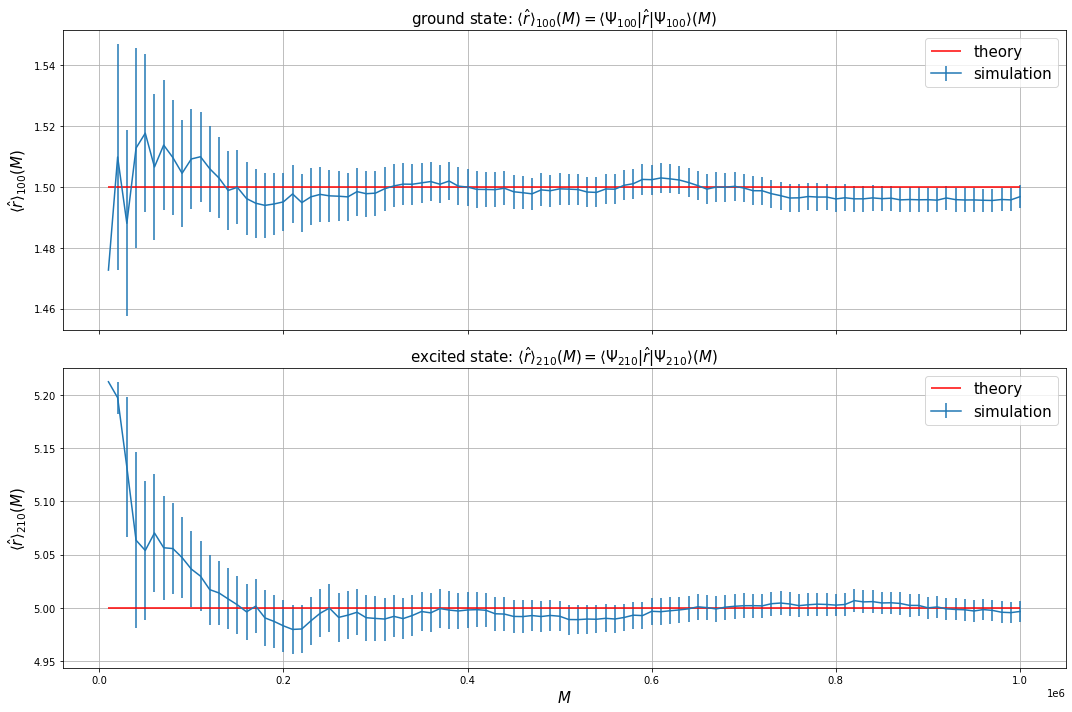

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot for uni_100
M, r_mean, r_error  = np.loadtxt("data/uni_100.txt", skiprows=1, unpack=True, delimiter=',')
ax[0].errorbar(M, r_mean, r_error, label="simulation")
ax[0].hlines(1.5, min(M), max(M), color='r', label="theory")
ax[0].set_ylabel(r"$\langle \hat{r} \rangle_{100} (M)$", size=15)
ax[0].set_title(r"ground state: $\langle \hat{r} \rangle_{100} (M) = \langle \Psi_{100} |\hat{r}| \Psi_{100} \rangle(M)$", size=15)
ax[0].grid()
ax[0].legend(fontsize=15)

# plot for uni_100
M, r_mean, r_error  = np.loadtxt("data/uni_210.txt", skiprows=1, unpack=True, delimiter=',')
ax[1].errorbar(M, r_mean, r_error, label="simulation")
ax[1].hlines(5, min(M), max(M), color='r', label="theory")
ax[1].set_ylabel(r"$\langle \hat{r} \rangle_{210} (M)$", size=15)
ax[1].set_title(r"excited state: $\langle \hat{r} \rangle_{210} (M) = \langle \Psi_{210} |\hat{r}| \Psi_{210} \rangle(M)$", size=15)
ax[1].grid()
ax[1].legend(fontsize=15)

plt.xlabel(r"$M$", size=15)

plt.tight_layout()
plt.show()

### Gaussian Trial Transition Probability

Now, we essentially repeat the procedure above except that we use a Gaussian transition probability. Thus, trial positions are generated according to 

$$
\begin{align}
    \vec{x}' = \vec{x_n} &+ \begin{bmatrix}
           \Delta x \\
           \Delta y \\
           \Delta z
         \end{bmatrix}
\end{align},
$$

where $ \Delta x,  \Delta y,  \Delta z$ are random variables that are independetly drawn from a gaussian distribution with mean $\mu=0$ and standard deviation $\sigma$.
For the ground state, we find an acceptance rate of $50.57\,\%$ using $\sigma = 0.75$. For the excited state, $\sigma = 1.9$ leads to an acceptance rate of $49.54\,\%$.

In the figure below, we visualize the sampled positions.

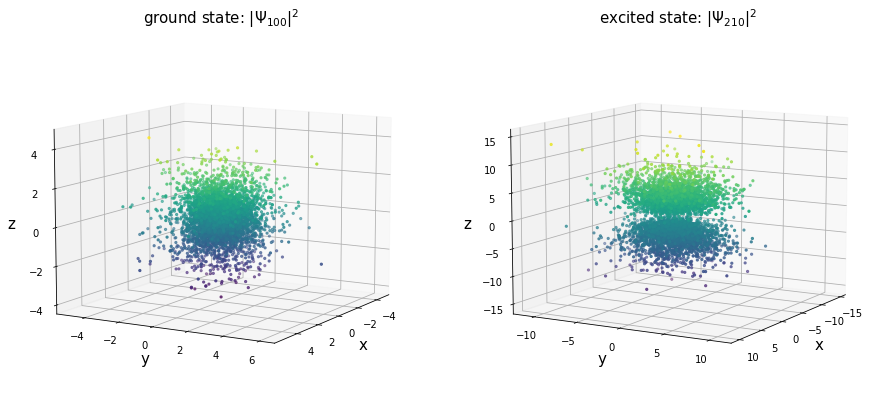

In [31]:
fig = plt.figure(figsize=(15,10))

# plot gaussian_110
x, y, z = np.loadtxt("data/gaussian_100.xyz", delimiter=',', unpack=True)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=z, marker='.')
ax1.set_xlabel('x', size=15)
ax1.set_ylabel('y', size=15)
ax1.set_zlabel('z', size=15)
ax1.view_init(10, 30)
ax1.set_title(r"ground state: $|\Psi_{100}|^2$", size=15)

# plot gaussian_210
x, y, z = np.loadtxt("data/gaussian_210.xyz", delimiter=',', unpack=True)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z, c=z, marker='.')
ax2.set_xlabel('x', size=15)
ax2.set_ylabel('y', size=15)
ax2.set_zlabel('z', size=15)
ax2.view_init(10, 30)
ax2.set_title(r"excited state: $|\Psi_{210}|^2$", size=15)

plt.show()

The next figure shows a plot of the progressive mean of the simulated radius $\langle \hat{r} \rangle$ as a function of the number of steps $M$ of the Metropolis algorithm for the Gaussian trial transition probability. For both cases, the progressive mean converges to the theoretical value. 

When we compare the results using the Gaussian and the uniform trial transition probability, we observe that the results are basically the same. For the same number of throws $M$, the uncertainties are in the same order. This corresponds to the statement from the lecture that the Metropolis algorithm typically does not depend on the choice of the trial transition probability. The main difference in different trial transition probabilities is the speed of convergence that is mostly irrelevant in this exercise since we equilibrate the alogrithm before using the sampled positions.

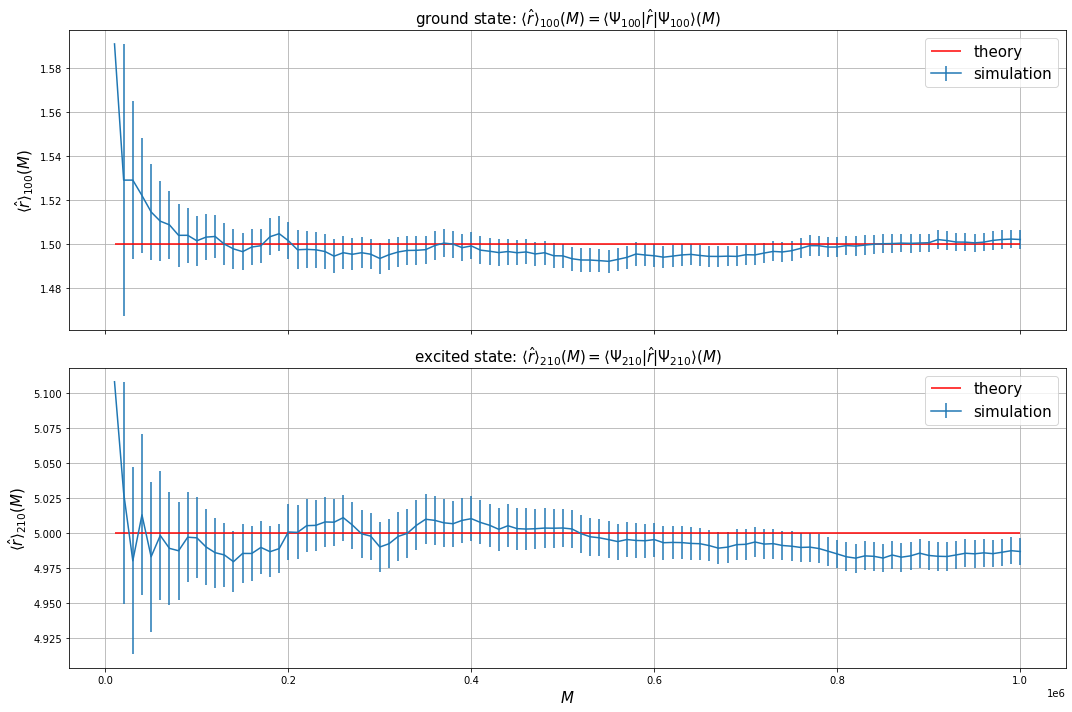

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot for gaussian_100
M, r_mean, r_error  = np.loadtxt("data/gaussian_100.txt", skiprows=1, unpack=True, delimiter=',')
ax[0].errorbar(M, r_mean, r_error, label="simulation")
ax[0].hlines(1.5, min(M), max(M), color='r', label="theory")
ax[0].set_ylabel(r"$\langle \hat{r} \rangle_{100} (M)$", size=15)
ax[0].set_title(r"ground state: $\langle \hat{r} \rangle_{100} (M) = \langle \Psi_{100} |\hat{r}| \Psi_{100} \rangle(M)$", size=15)
ax[0].grid()
ax[0].legend(fontsize=15)

# plot for gaussian_100
M, r_mean, r_error  = np.loadtxt("data/gaussian_210.txt", skiprows=1, unpack=True, delimiter=',')
ax[1].errorbar(M, r_mean, r_error, label="simulation")
ax[1].hlines(5, min(M), max(M), color='r', label="theory")
ax[1].set_ylabel(r"$\langle \hat{r} \rangle_{210} (M)$", size=15)
ax[1].set_title(r"excited state: $\langle \hat{r} \rangle_{210} (M) = \langle \Psi_{210} |\hat{r}| \Psi_{210} \rangle(M)$", size=15)
ax[1].grid()
ax[1].legend(fontsize=15)

plt.xlabel(r"$M$", size=15)

plt.tight_layout()
plt.show()

### Choice of Starting Point

Once we have chosen a trial transition probability, the main free parameter of the Metropolis algorithm is the starting point $\vec{x_0}$. We should chose it reasonably such that it lies in a domain, where the probability density function that we seek to sample differs significantly from $0$. Otherwise, the equilibration of the Metropolis algorithm in order to observe convergence will take significantly more steps.

An illustration of this phenomenon can be found in the figure below. There, we plot the simulated value of the expecation value of the radius operator $\langle \hat{r} \rangle$ of the ground state of the hydrogen atom using a uniform trial transition probability. Unlike above, we do not take the origin but 

$$
\begin{align}
    \vec{x_0} &= \begin{bmatrix}
           2000 \\
           0 \\
           0
         \end{bmatrix}
\end{align},
$$

as the starting position of the Metropolis algorithm. This leads to simulated values very far away from the theoretical value because the convergence of the Metropolis algorithm takes much more steps than we plotted. 

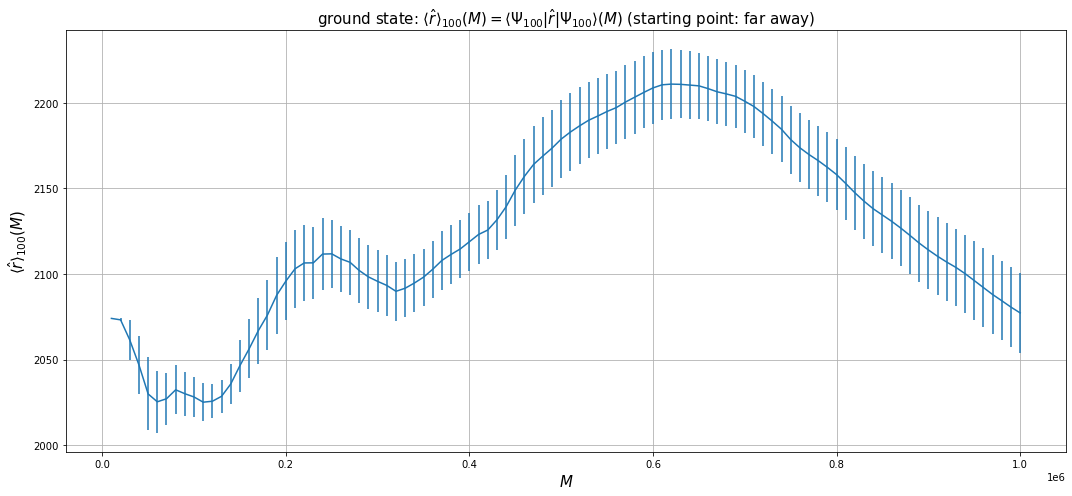

In [9]:
plt.figure(figsize=(15, 7))

# plot for uni_100_far_away
M, r_mean, r_error  = np.loadtxt("data/uni_100_far_away.txt", skiprows=1, unpack=True, delimiter=',')
plt.errorbar(M, r_mean, r_error)
plt.ylabel(r"$\langle \hat{r} \rangle_{100} (M)$", size=15)
plt.title(r"ground state: $\langle \hat{r} \rangle_{100} (M) = \langle \Psi_{100} |\hat{r}| \Psi_{100} \rangle(M)$ (starting point: far away)", size=15)
plt.grid()

plt.xlabel(r"$M$", size=15)

plt.tight_layout()
plt.show()

Below, we can clearly see the slow/missing convergence for the starting point far away from the origin of the 3D space.

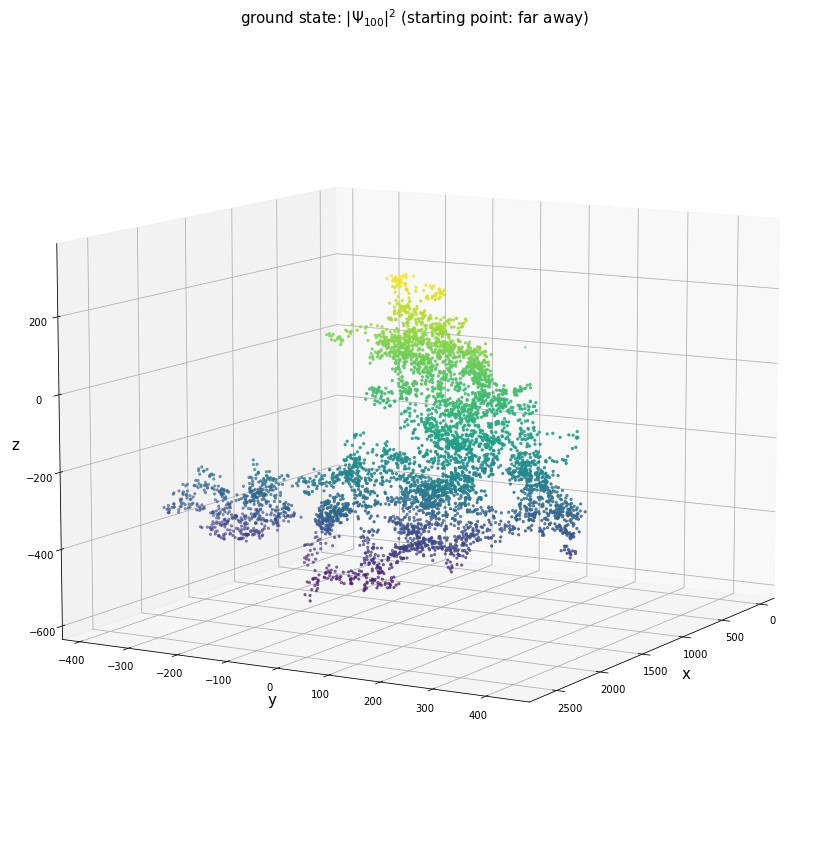

In [10]:
fig = plt.figure(figsize=(15,15))

# plot uni_110
x, y, z = np.loadtxt("data/uni_100_far_away.xyz", delimiter=',', unpack=True)
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x, y, z, c=z, marker='.')
ax1.set_xlabel('x', size=15)
ax1.set_ylabel('y', size=15)
ax1.set_zlabel('z', size=15)
ax1.view_init(10, 30)
ax1.set_title(r"ground state: $|\Psi_{100}|^2$ (starting point: far away)", size=15)

plt.show()